# ESE playground

## transpilation

In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, Aer, execute, BasicAer
import numpy as np

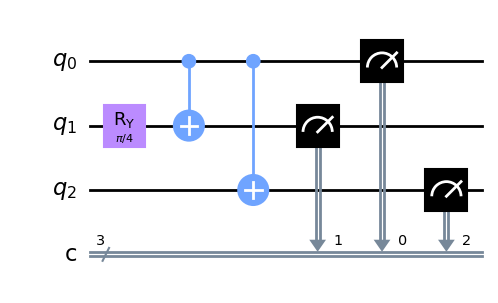

In [2]:
# define simple circuit
qc = QuantumCircuit(3,3)
qc.ry(45/360*2*np.pi,1)
qc.cx(0,1)
qc.cx(0,2)
qc.measure([0,1,2], [0,1,2])
qc.draw('mpl')

In [3]:
# use fake santiago backend
from qiskit.providers.fake_provider import FakeSantiagoV2
santiago = FakeSantiagoV2()
santiago.operations

[Instruction(name='id', num_qubits=1, num_clbits=0, params=[]),
 Instruction(name='rz', num_qubits=1, num_clbits=0, params=[Parameter(λ)]),
 Instruction(name='sx', num_qubits=1, num_clbits=0, params=[]),
 Instruction(name='x', num_qubits=1, num_clbits=0, params=[]),
 Instruction(name='cx', num_qubits=2, num_clbits=0, params=[]),
 Instruction(name='reset', num_qubits=1, num_clbits=0, params=[]),
 Instruction(name='measure', num_qubits=1, num_clbits=1, params=[]),
 Delay(duration=t[unit=dt])]

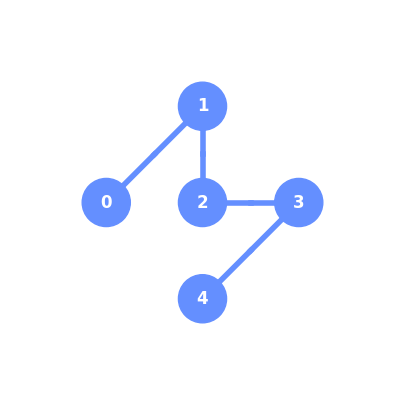

In [4]:
from qiskit.visualization import plot_gate_map

plot_gate_map(santiago)

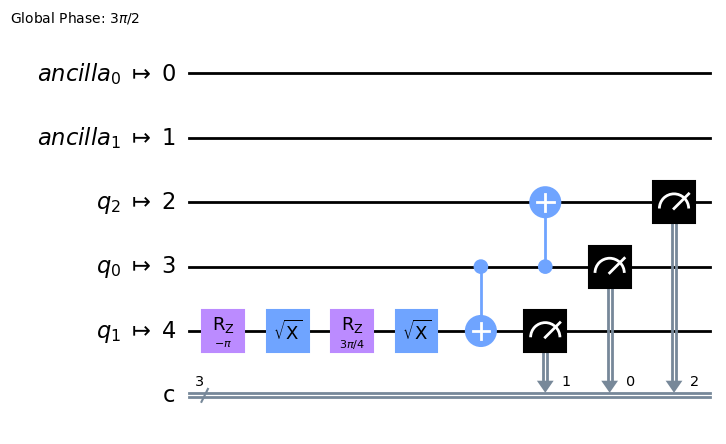

In [5]:
from qiskit import transpile
transpile_qc = transpile(qc, santiago)
transpile_qc.draw('mpl')

## superposition

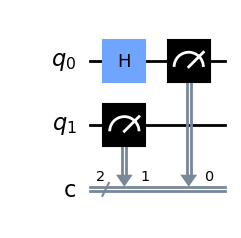

In [6]:
# define simple circuit
qc_coin = QuantumCircuit(2,2)
qc_coin.h(0)
qc_coin.measure([0,1], [0,1])
qc_coin.draw('mpl')

## measuring

In [7]:
import qiskit.quantum_info as qi
from qiskit.providers.aer import QasmSimulator

qc_coin_wo_measurement = qc_coin.remove_final_measurements(inplace=False)

stv1 = qi.Statevector.from_instruction(qc_coin_wo_measurement)
sim = QasmSimulator()
options = {'method': 'statevector'}
execute(qc_coin_wo_measurement, sim, backend_options=options)

stv1.draw('latex', prefix='Statevector1:')

<IPython.core.display.Latex object>

## errors

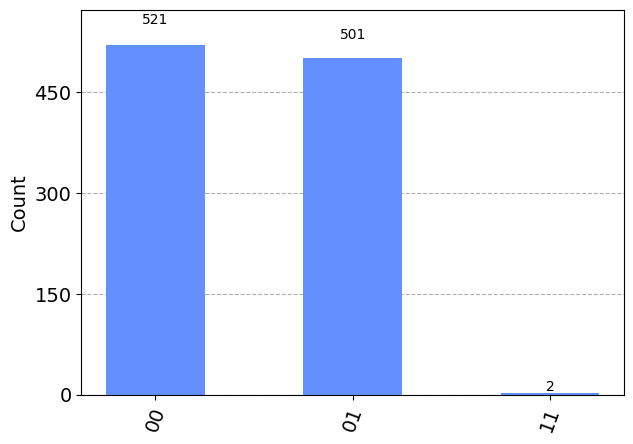

In [8]:
from qiskit.visualization import plot_histogram

job = execute(qc_coin, santiago, shots=1024) #we specify our job, which circuit to execute and how many times
result = job.result() #we extract the results from the job
counts = result.get_counts() #this time, we are not getting the state, but the counts!
plot_histogram(counts) #a new plotting method! this works for counts obviously!

# Circuit testing

## unittest

/home/marc/anaconda3/envs/qiskit_nature/lib/python3.10/site-packages/qiskit/utils/classtools.py:112: RuntimeWarning: Cregbundle set to False since an instruction needs to refer to individual classical wire
  retval = method(*args, **kwargs)


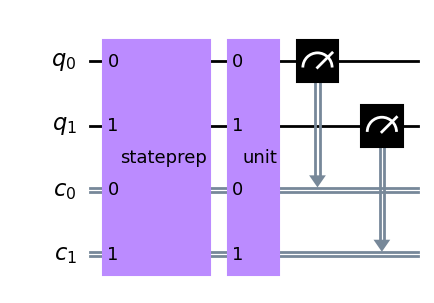

In [9]:
# define unit 
qc_unit = QuantumCircuit(2,2, name='unit')
qc_unit.h(0)
qc_unit.cx(0,1)

# prepare state "|11>"
qc_stateprep = QuantumCircuit(2,2, name='stateprep')
qc_stateprep.x(0)
qc_stateprep.x(1)

# combine stateprep and unit
qc_unittest = QuantumCircuit(2,2)
qc_unittest.append(qc_stateprep, [0,1], [0,1])
qc_unittest.append(qc_unit, [0,1], [0,1])

qc_unittest.measure([0,1], [0,1])

qc_unittest.draw('mpl')

## overall

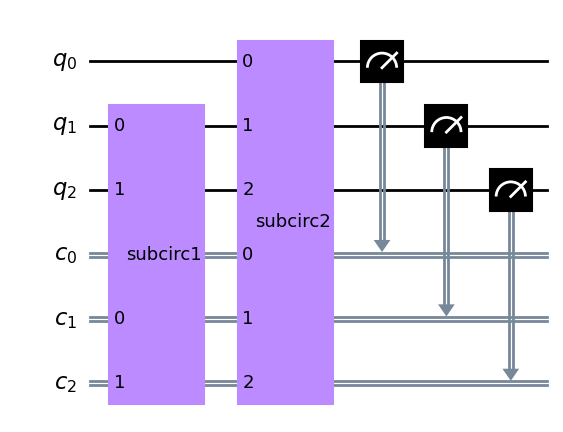

In [10]:
def subcirc1():
    subcirc1 = QuantumCircuit(2,2, name='subcirc1')
    subcirc1.h(0)
    subcirc1.cx(0,1)
    return subcirc1

def subcirc2():
    subcirc2 = QuantumCircuit(3,3, name='subcirc2')
    subcirc2.x(0)
    subcirc2.x(1)
    subcirc2.x(2)
    subcirc2.ccx(0,1,2)
    return subcirc2

scirc1 = subcirc1()
scirc2 = subcirc2()

qc_swe1 = QuantumCircuit(3,3)
qc_swe1.append(scirc1, [1,2], [1,2])
qc_swe1.append(scirc2, [0,1,2], [0,1,2])
qc_swe1.measure([0,1,2], [0,1,2])
qc_swe1.draw('mpl')

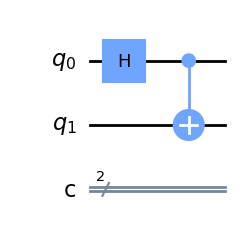

In [11]:
scirc1.draw('mpl')

# Entanglement, ideal

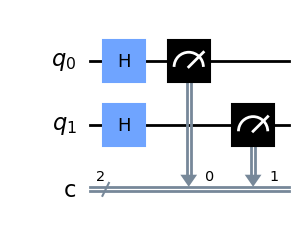

In [12]:
qc_no_ent = QuantumCircuit(2,2)
qc_no_ent.h([0,1])
qc_no_ent.measure([0,1], [0,1])
qc_no_ent.draw('mpl')

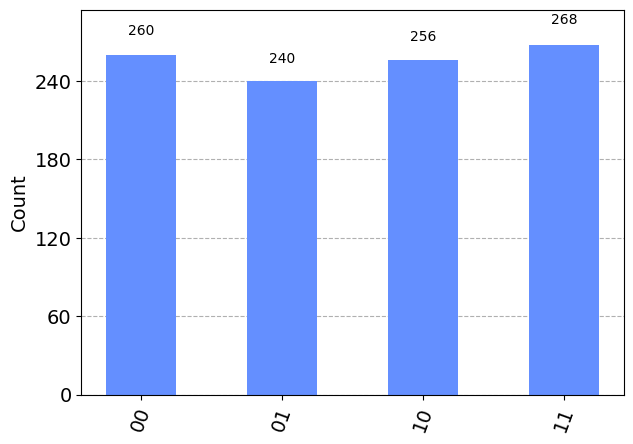

In [13]:
from qiskit.visualization import plot_histogram

aer_sim = Aer.get_backend('aer_simulator')

job = execute(qc_no_ent, aer_sim, shots=1024) #we specify our job, which circuit to execute and how many times
result = job.result() #we extract the results from the job
counts = result.get_counts() #this time, we are not getting the state, but the counts!
plot_histogram(counts) #a new plotting method! this works for counts obviously!

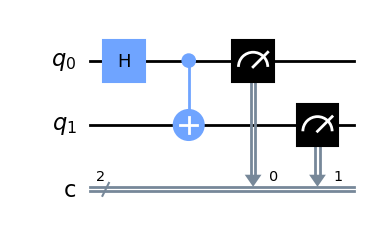

In [14]:
qc_ent = QuantumCircuit(2,2)
qc_ent.h([0])
qc_ent.cx(0,1)
qc_ent.measure([0,1], [0,1])
qc_ent.draw('mpl')

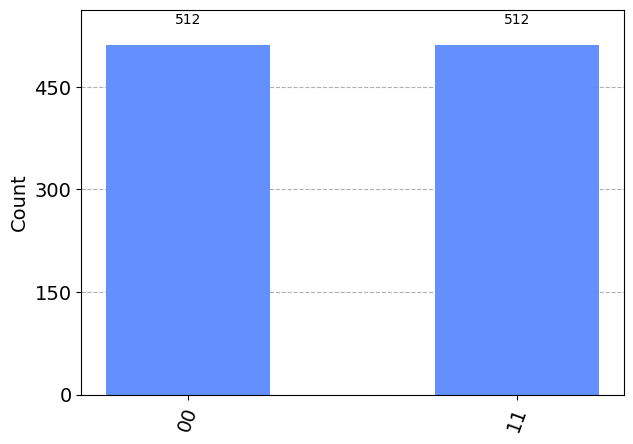

In [15]:
from qiskit.visualization import plot_histogram

aer_sim = Aer.get_backend('aer_simulator')

job = execute(qc_ent, aer_sim, shots=1024) #we specify our job, which circuit to execute and how many times
result = job.result() #we extract the results from the job
counts = result.get_counts() #this time, we are not getting the state, but the counts!
plot_histogram(counts) #a new plotting method! this works for counts obviously!

# ghz with statevector

In [16]:
import qiskit.quantum_info as qi
from qiskit.providers.aer import QasmSimulator

qc_ent_wo_measurement = qc_ent.remove_final_measurements(inplace=False)

stv1 = qi.Statevector.from_instruction(qc_ent_wo_measurement)
sim = QasmSimulator()
options = {'method': 'statevector'}
execute(qc_ent_wo_measurement, sim, backend_options=options)

stv1.draw('latex', prefix='Statevector1:')

<IPython.core.display.Latex object>